In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [6]:
data = pd.read_csv('data/data.csv')

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
col = data.columns       
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [9]:
y = data.diagnosis                           
drop_cols = ['Unnamed: 32','id','diagnosis']
x = data.drop(drop_cols,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


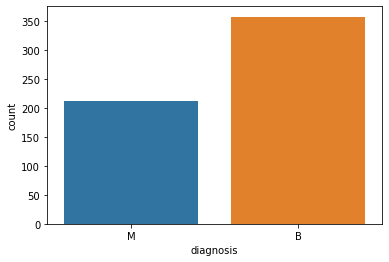

In [12]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

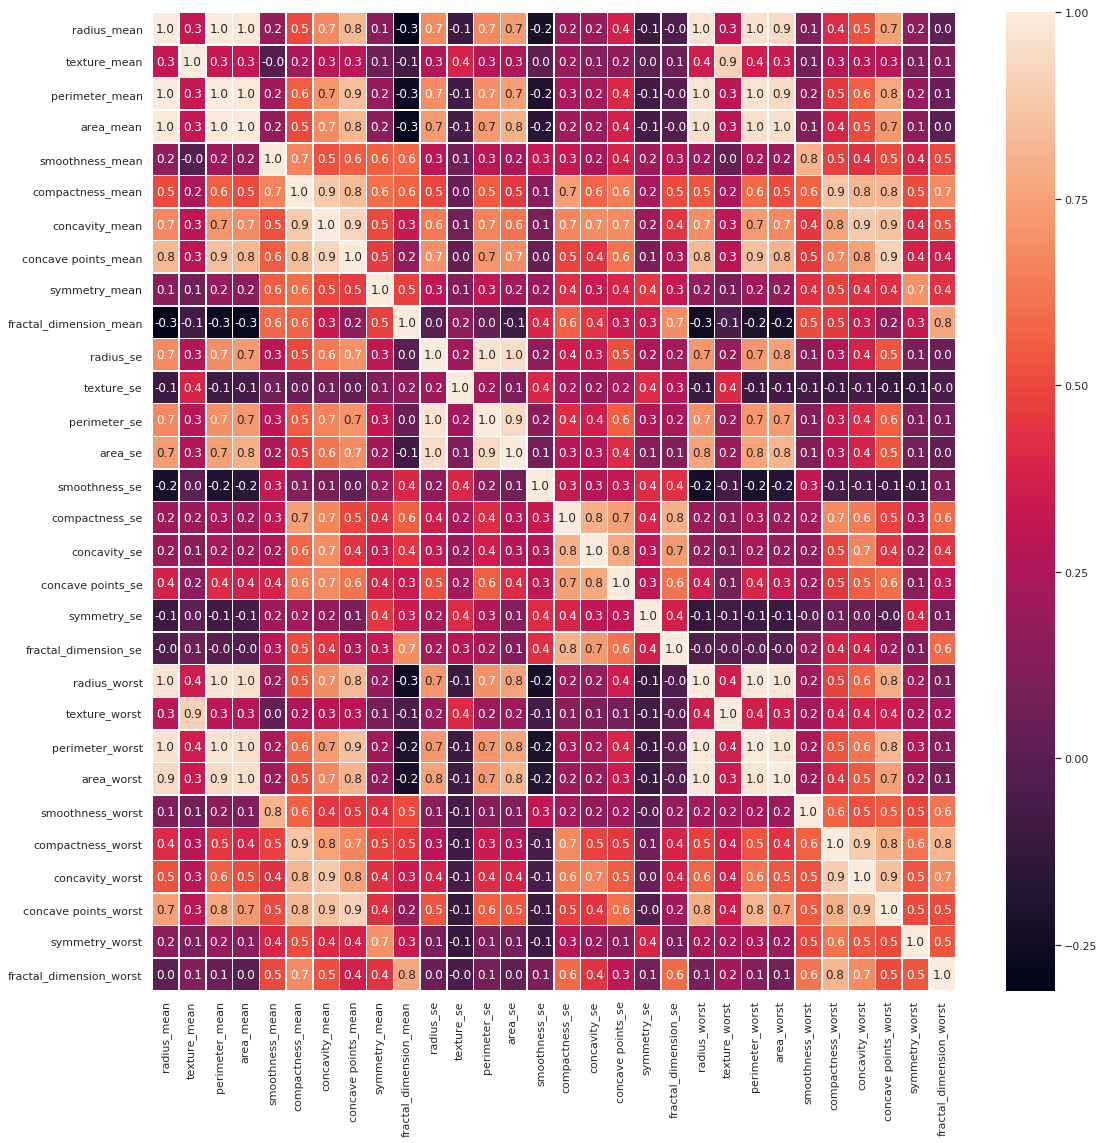

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [20]:
drop_cols = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']
df = x.drop(drop_cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


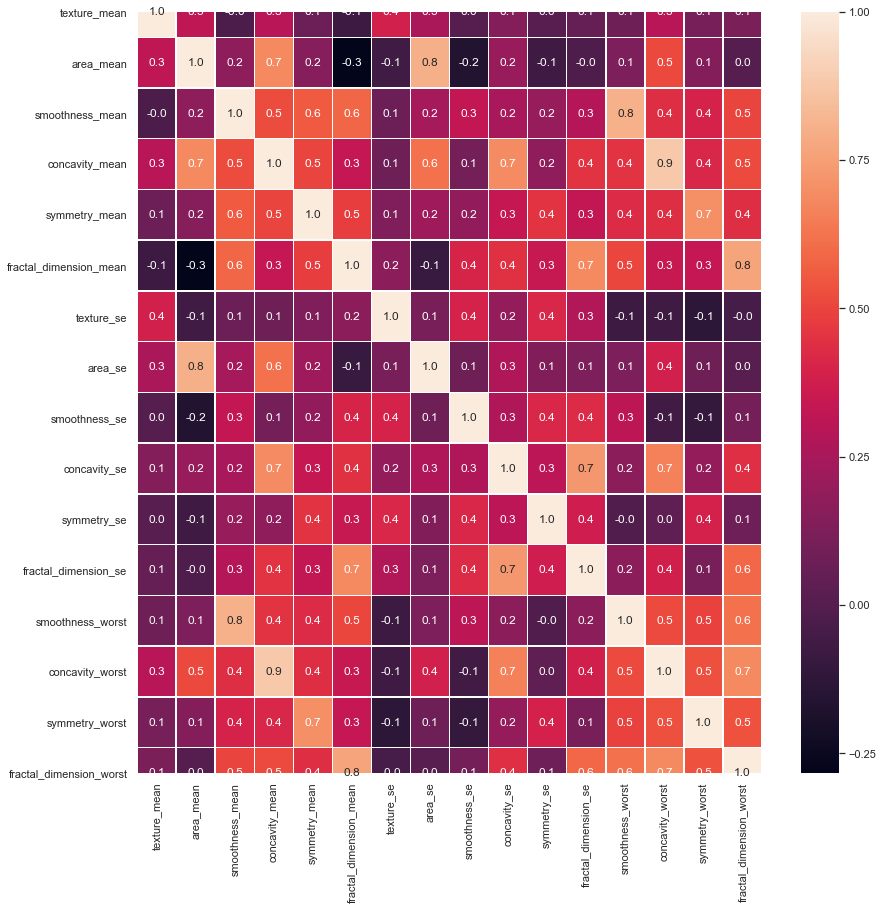

In [25]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, linewidth=.5, fmt= '.1f',ax=ax);

In [26]:
#Minimal feature selection model
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)
clf_1 = xgb.XGBClassifier(random_state=42)
clf_1 = clf_1.fit(x_train, y_train)

The accuracy is:  0.9766081871345029


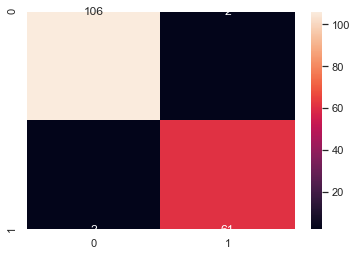

In [29]:
print('The accuracy is: ', accuracy_score(y_test, clf_1.predict(x_test)))
cm = confusion_matrix(y_test, clf_1.predict(x_test))
sns.heatmap(cm, annot=True,fmt='d')

In [30]:
#Univariate feature selection and XGBoost
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
#Choosing 10 best features
select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)
print('Score List: ', select_feature.scores_)
print('Feature List: ',x_train.columns)

Score List:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature List:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is 0.9707602339181286


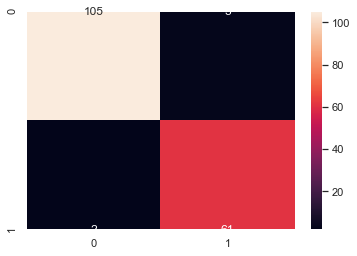

In [32]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_2 = xgb.XGBClassifier().fit(x_train_2, y_train)

print('Accuracy is', accuracy_score(y_test, clf_2.predict(x_test_2)))
cm_2 = confusion_matrix(y_test, clf_2.predict(x_test_2))
sns.heatmap(cm_2, annot=True, fmt='d');

In [33]:
#Recursive Feature Elimination with Cross-Validation
from sklearn.feature_selection import RFECV
clf_3 = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf_3, step=1, cv=5, scoring='accuracy', n_jobs=-1).fit(x_train, y_train)

print('Optimal no: of features: ', rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])

Optimal no: of features:  16
Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [34]:
print('Accuracy is: ', accuracy_score(y_test, rfecv.predict(x_test)))

Accuracy is:  0.9766081871345029


[Text(0, 0.5, 'CV scores'), Text(0.5, 0, 'No: of selected features')]

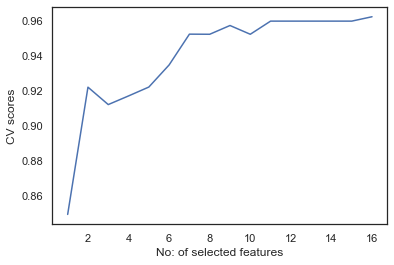

In [35]:
num_features = [i for i in range(1, len(rfecv.grid_scores_)+1)]
cv_scores = rfecv.grid_scores_
ax = sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel='No: of selected features', ylabel='CV scores')

In [36]:
#Feature Extraction using PCA
#An important prerequisite for PCA is that the column values should be normalised
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

x_train_norm = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_norm = (x_test-x_test.mean())/(x_test.max()-x_test.min())

Text(0, 0.5, 'Cumulative Explained variance')

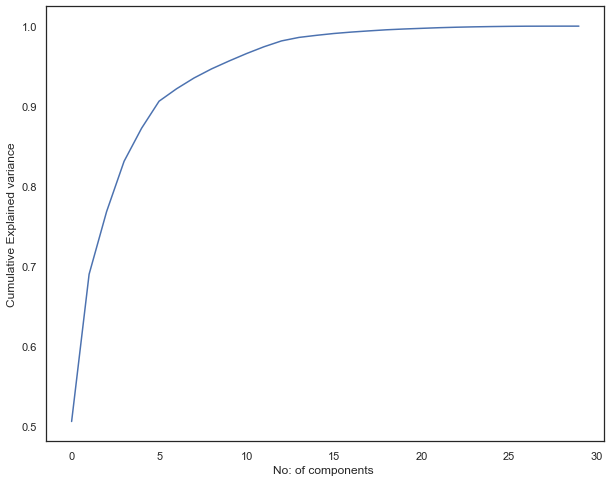

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_norm)

plt.figure(1, figsize=(10,8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No: of components ')
plt.ylabel('Cumulative Explained variance')